<a href="https://colab.research.google.com/github/rahitya-123/Classification-and-Regression-Trees---Statistics/blob/main/Classification_and_Regression_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Classification Tree in Scikit-learn**

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
data = pd.read_csv('data.csv')
#print(data.columns)
X, y = data[['radius_mean','concave points_mean']], data['diagnosis']

In [4]:
#split the data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=1)

In [5]:
#instantiate dt
dt = DecisionTreeClassifier(max_depth=6, random_state=1)

#fit dt to the training set
dt.fit(X_train,y_train)

#predict the test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])

#Evaluate the test set accuracy
acc = accuracy_score(y_test,y_pred)
print("Test set accuracy: {:.2f}".format(acc))

['B' 'B' 'B' 'M' 'B']
Test set accuracy: 0.89


In [7]:
#instantaite the dt_entropy in-order to reduce the impurity/increase the Information gain
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy',random_state=1)
dt_entropy.fit(X_train,y_train)
y_pred = dt_entropy.predict(X_test)
accuracy_entropy = accuracy_score(y_test,y_pred)
print(f'accuracy achieved using entropy : {accuracy_entropy:.3f}')


#instantaite the dt_gini in-order to reduce the impurity/increase the Information gain
dt_gini = DecisionTreeClassifier(max_depth=8,criterion='gini',random_state=1)
dt_gini.fit(X_train,y_train)
y_pred = dt_gini.predict(X_test)
accuracy_gini = accuracy_score(y_test,y_pred)
print(f'accuracy achieved using gini : {accuracy_gini : .3f}')


accuracy achieved using entropy : 0.886
accuracy achieved using gini :  0.921


**Logistic Regression Model**

In [ ]:
# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import LogisticRegression

# Instatiate logreg
logreg = LogisticRegression(random_state=1)

# Fit logreg to the training set
logreg.fit(X_train,y_train)

In [24]:
# Define a list called clfs containing the two classifiers logreg and dt
clfs = [logreg, dt]

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

def plot_labeled_decision_regions(X, y, models):
    # X: DataFrame with two columns
    # y: Series/array of labels
    # models: list of two trained classifiers

    # Convert y to numerical labels if necessary
    le = LabelEncoder() # Move LabelEncoder initialization here
    if not np.issubdtype(y.dtype, np.number):
        y = le.fit_transform(y)

    # Set up meshgrid
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    titles = ['Logistic Regression', 'Decision Tree Classifier']

    for i, model in enumerate(models):
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        # Convert Z to numerical labels if necessary
        # Instead of using le.transform directly, use le.classes_ to map the predictions
        if not np.issubdtype(Z.dtype, np.number):
            Z = np.where(Z == le.classes_[0], 0, 1) # Assuming binary classification

        axes[i].contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdBu)
        scatter = axes[i].scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.RdBu, edgecolor='k')
        axes[i].set_xlabel(X.columns[0])
        axes[i].set_ylabel(X.columns[1])
        axes[i].set_title(titles[i])
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


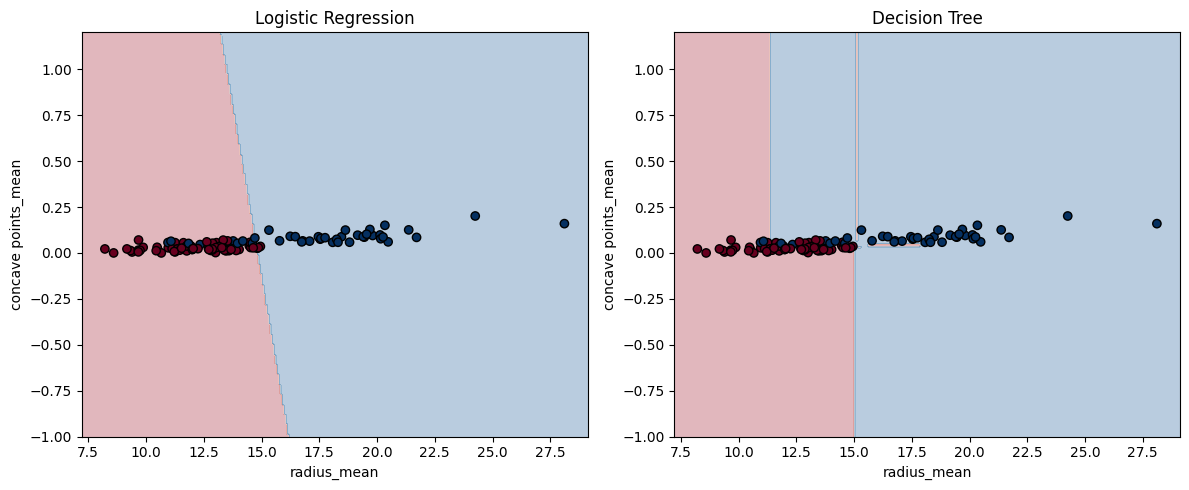

In [30]:
# Review the decision regions of the two classifiers
plot_labeled_decision_regions(X_test, y_test, clfs)

**Regression Tree Models**

In [8]:
#converting the .data file extracted from https://archive.ics.uci.edu/dataset/9/auto+mpg website to csv and loading it to df
import pandas as pd

# Define column names
columns = [
    'mpg', 'cylinders', 'displacement', 'horsepower',
    'weight', 'acceleration', 'model_year', 'origin', 'car_name'
]

# Read the data
df = pd.read_csv(
    'auto-mpg.data',
    delim_whitespace=True,
    names=columns,
    na_values='?',          # Handle missing values
    quotechar='"',          # Handle quoted car names
    comment='\t',           # Ignore tabbed comments if any
    skipinitialspace=True   # Skip spaces after delimiter
)

# Save as CSV
df.to_csv('auto-mpg.csv', index=False)

<ipython-input-8-4887f3bb13ca>:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(


In [9]:
#seeing the df data to get an overview of the dataset
print(df.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   model_year  origin                   car_name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino  


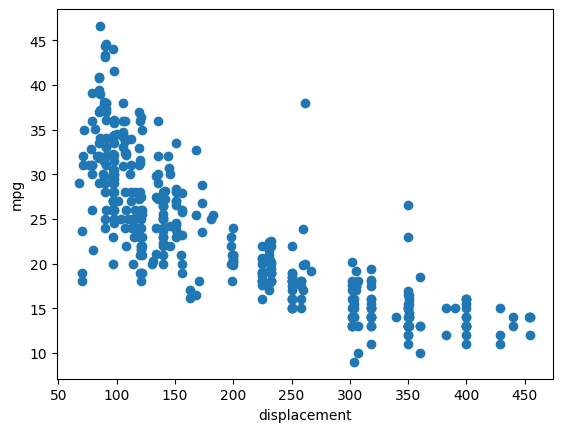

In [10]:
#create a scatter plot between mp and displacement variables to see if the relationship is linear or non-linear
import matplotlib.pyplot as plt

plt.scatter(df['displacement'],df['mpg'])
plt.xlabel('displacement')
plt.ylabel('mpg')
plt.show()

In [11]:
#import DecisionTreeregressor
from sklearn.tree import DecisionTreeRegressor
#import train_test_split
from sklearn.model_selection import train_test_split
#import mean_squared_error as mse
from sklearn.metrics import mean_squared_error as MSE

In [13]:
X,y = df[['displacement']],df['mpg']
#split the data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [15]:
#instantiate a decisiontreeregressor
dtr=DecisionTreeRegressor(max_depth=8,min_samples_leaf=0.13,random_state=3)

#fit 'dtr' to the training set
dtr.fit(X_train, y_train)

#predict test-set labels
y_pred = dtr.predict(X_test)

#compute test-set MSE
mse_dtr = MSE(y_test,y_pred)
# compute test-set rmse
rmse_dtr = mse_dtr**(1/2)
print("Test set RMSE of dt: {:.2f}".format(rmse_dtr))


Test set RMSE of dt: 4.69


In [17]:
# comparision of Linear Regression Model outcome with Regression Tree Model outcome

#import Linearregression
from sklearn.linear_model import LinearRegression
# instantiate a linearregreesion
lr = LinearRegression()
# fit 'lr' to the training set
lr.fit(X_train,y_train)
# predict test set labels
y_pred_lr = lr.predict(X_test)

# Compute mse_lr
mse_lr = MSE(y_test,y_pred_lr)
#compute rmse_lr
rmse_lr = mse_lr**(1/2)

# Print rmse_lr
print("Test set RMSE of lr: {:.2f}".format(rmse_lr))

# Print rmse_dt
print('Regression Tree test set RMSE: {:.2f}'.format(rmse_dtr))

Test set RMSE of lr: 4.74
Regression Tree test set RMSE: 4.69
